In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("pearson_corr.csv")
df_month

,August,April_6,February_3,November_7,May_7,May_4,April_11,May,June,June_2,...,February,March_3,January_2,July_2,August_3,September_4,April_2,April_3,November_4,March
0,-0.469484,-0.192907,0.483186,-0.069001,0.056523,-0.175275,-0.139798,0.418716,-0.663796,-0.270935,...,-1.001858,0.135771,1.024350,-0.599803,0.147482,-0.012603,0.108764,0.085459,-0.017801,-0.907154
1,-0.469484,-0.155950,0.116145,-0.069001,0.650787,-0.767088,-0.343262,0.410679,-0.663796,-0.270935,...,0.212375,0.430034,0.737523,-0.599803,0.147482,-0.012603,0.595570,0.229490,-0.017801,-0.443577
2,-0.720683,-0.271062,0.471996,0.137035,-0.117836,-0.225223,-0.176245,-0.180583,-0.466195,-0.694518,...,-0.499056,-0.032558,0.707607,-0.506850,0.172636,-0.400264,0.308116,0.118633,-0.045831,-0.985656
3,-0.270299,0.424437,0.420501,0.076111,0.573503,-0.321780,-0.350389,0.463371,-0.782857,-0.716753,...,-0.007918,0.234274,0.554919,-0.322204,0.159405,0.110438,0.245459,0.420907,-0.265576,-0.320712
4,-0.794188,-0.115674,0.158944,0.070612,-0.201221,-0.419739,-0.457755,0.292913,-0.444716,-0.868361,...,-0.820051,0.140670,0.646971,-0.522521,0.084627,0.144277,-0.309295,-0.049493,-0.054767,-0.545358
5,-0.810097,0.022826,0.522460,0.075670,0.868295,-0.525846,-0.221788,-0.213229,-0.250731,-0.256666,...,-0.777523,0.184199,0.830451,-0.592175,0.061596,0.054123,0.510851,-0.195406,-0.053476,-0.212050
6,-0.177833,0.090922,0.014395,-0.043532,0.184597,-0.043810,0.146627,0.282432,-0.368955,-0.744606,...,-0.361617,0.064873,0.781353,-0.563354,0.491243,0.237874,0.103903,0.344380,-0.210779,-0.259086
7,-1.010284,-0.177244,0.171814,0.232178,0.145341,-0.391165,0.111823,0.844975,-0.286007,-0.718019,...,0.008990,0.611842,0.805724,-0.228093,0.681252,-0.431167,0.385310,0.010624,-0.211901,-0.179778
8,-0.426508,-0.057897,0.445708,0.274656,0.333250,-0.261227,0.077770,0.495763,-0.753116,-0.987519,...,-0.526624,0.313396,0.440587,-0.714455,-0.152230,0.020960,0.416656,0.443440,-0.353877,-0.162627
9,-0.589004,0.377096,0.261804,0.081320,0.446709,-0.571863,-0.154538,0.406824,-0.622675,-0.494078,...,0.052374,-0.147984,0.873517,-0.738149,0.156535,-0.097211,-0.013074,-0.212123,-0.290302,-0.041109


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :20]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 4.93987433e-01, -1.38666439e+00,  8.46604291e-01,
        -3.32719128e-01, -1.19059994e+00,  1.14820287e+00,
        -1.02080814e-02,  7.93408267e-01,  9.00031143e-02,
         1.69921054e+00,  5.44080755e-02, -1.13615287e+00,
         3.68129571e-01,  6.98441533e-01,  1.14832029e+00,
         1.74251282e-01, -1.39155262e-01,  1.31709502e+00,
         4.63614852e-01, -6.40911989e-01],
       [ 4.93987433e-01, -1.24442718e+00, -1.43981540e+00,
        -3.32719128e-01,  1.24568302e+00, -7.12181490e-01,
        -8.04032398e-01,  7.62520528e-01,  9.00031143e-02,
         1.69921054e+00,  5.44080755e-02, -9.74519467e-01,
         3.68129571e-01,  6.98441533e-01,  1.14832029e+00,
         1.74251282e-01, -1.39155262e-01, -3.76995467e-01,
         4.63614852e-01, -9.32192815e-01],
       [-3.75732655e-01, -1.68746489e+00,  7.76902108e-01,
         5.47439334e-01, -1.90541201e+00,  9.91190101e-01,
        -1.52410116e-01, -1.50970878e+00,  9.86610249e-01,
         2.20896187e-01, -2.6

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] #df.iloc[43:]['avg']
    y_test.append(y_ts)

In [8]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [9]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

In [10]:
x_test = df_month.iloc[43:, :20]
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.5242643 , -0.56834002,  1.58349574, -0.60780297, -1.23143643,
         0.58207209,  0.70012832,  1.93545575,  1.13032349, -0.42969401,
        -1.35452671, -0.39739105, -0.51442273,  1.72019939, -0.65990714,
        -2.59148367,  1.10480983,  0.09218439, -0.21570834, -0.66900874],
       [-1.82921775, -0.79142582, -0.32727854, -2.12353603,  1.40762748,
         0.5250594 ,  2.3168683 ,  0.39000974,  0.92548358,  0.77028027,
         0.86189103, -1.2470278 ,  0.28888342,  0.15761628,  0.78054776,
        -0.71442493,  0.92489835, -2.34171289,  1.75745985, -0.67302001],
       [ 0.88548891,  1.06403682,  0.79271338, -0.39476845,  0.09791316,
         1.48073281,  0.03693208, -1.63516606, -0.19518813, -0.35712106,
        -0.49591246, -0.74657098, -2.47583286,  0.58035655, -1.05438381,
        -0.1015789 , -0.74245764,  0.05131182, -1.23312489, -0.16713748],
       [-0.08459292, -1.26569071,  0.6750798 ,  0.19939784,  0.05540889,
         0.59774003,  0.36205552,  0.46784355,  

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 9}
Best Score: 0.12923887538575812
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 43}
Best Score: 0.09661034905386695
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 39}
Best Score: 0.13274614532628637
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 50}
Best Score: 0.2473076208128639
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 4}
Best Score: 0.15615491936308185


In [13]:
y_pred_list

[array([ 0.2001122 , -0.07146693,  0.07658729,  0.02821008, -0.00290212,
         0.14610889,  0.26451455,  0.18633102, -0.2547714 , -0.20631878,
        -0.54535582, -0.4057586 , -0.1593373 ,  0.48607252,  0.01785515,
        -0.2091552 ]),
 array([ 0.13093681, -0.00482721, -0.08794276,  0.20430272,  0.06398976,
         0.01018451,  0.03363304, -0.51116783,  0.00090045, -0.22244256,
        -0.5526868 , -0.10473732, -0.30600067,  0.3324898 ,  0.26008911,
        -0.11684694]),
 array([ 0.08765619,  0.14644657, -0.06087979, -0.03399495, -0.06924025,
        -0.10861119,  0.05429254, -0.11837008, -0.02683789, -0.45416348,
        -0.42314755, -0.16593486, -0.07971591,  0.20953797, -0.00208588,
        -0.00048593]),
 array([ 1.28254273e-02,  1.48947974e-01, -5.31674383e-04, -1.41554092e-02,
        -4.69075808e-03,  1.43091319e-02, -5.09476362e-02,  2.25408261e-01,
         1.65196405e-01, -4.17645450e-01, -6.22935741e-01, -3.64002953e-01,
        -1.87889384e-01,  3.10813605e-01,  1.5

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.10877158098252315,
 0.6714084153722814,
 0.43166222086419437,
 0.5388860473479742,
 -0.15482863710370995]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/pearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/20 predictors/pearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/pearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'hgt+vwind Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/20 predictors/pearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:
y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 9}
Best Score: 0.12923887538575812
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 43}
Best Score: 0.09661034905386695
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 39}
Best Score: 0.13274614532628637
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 50}
Best Score: 0.2473076208128639
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 4}
Best Score: 0.15615491936308185


In [21]:
y_pred_list_rf

[array([ 0.2001122 , -0.07146693,  0.07658729,  0.02821008, -0.00290212,
         0.14610889,  0.26451455,  0.18633102, -0.2547714 , -0.20631878,
        -0.54535582, -0.4057586 , -0.1593373 ,  0.48607252,  0.01785515,
        -0.2091552 ]),
 array([ 0.13093681, -0.00482721, -0.08794276,  0.20430272,  0.06398976,
         0.01018451,  0.03363304, -0.51116783,  0.00090045, -0.22244256,
        -0.5526868 , -0.10473732, -0.30600067,  0.3324898 ,  0.26008911,
        -0.11684694]),
 array([ 0.08765619,  0.14644657, -0.06087979, -0.03399495, -0.06924025,
        -0.10861119,  0.05429254, -0.11837008, -0.02683789, -0.45416348,
        -0.42314755, -0.16593486, -0.07971591,  0.20953797, -0.00208588,
        -0.00048593]),
 array([ 1.28254273e-02,  1.48947974e-01, -5.31674383e-04, -1.41554092e-02,
        -4.69075808e-03,  1.43091319e-02, -5.09476362e-02,  2.25408261e-01,
         1.65196405e-01, -4.17645450e-01, -6.22935741e-01, -3.64002953e-01,
        -1.87889384e-01,  3.10813605e-01,  1.5

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.10877158098252315,
 0.6714084153722814,
 0.43166222086419437,
 0.5388860473479742,
 -0.15482863710370995]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/pearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/20 predictors/pearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/hgt+vwind/20 predictors/pearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'hgt+vwind Predicted vs Actual 20p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'20p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/20 predictors/pearson/comparison plots/randomforest


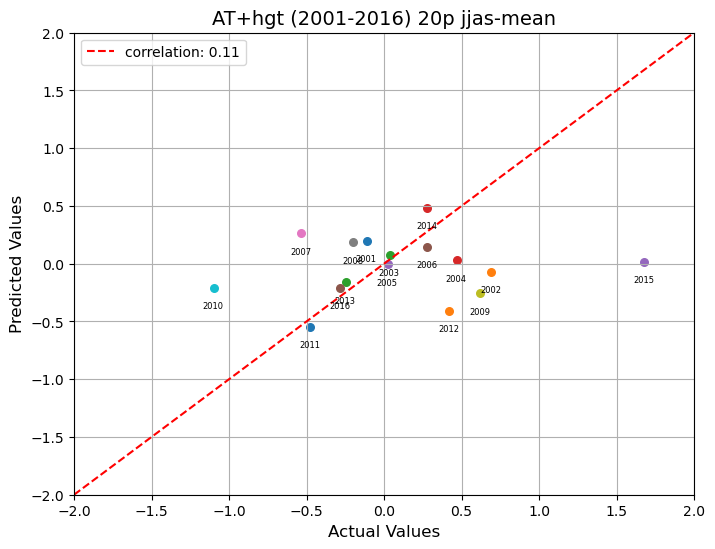

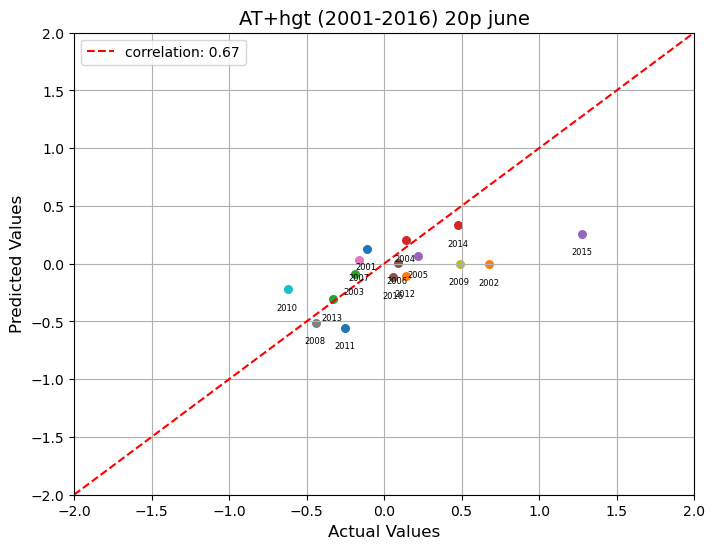

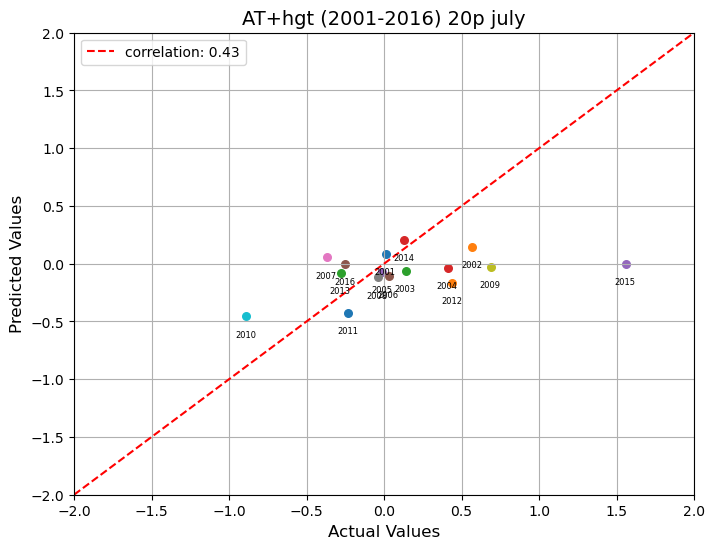

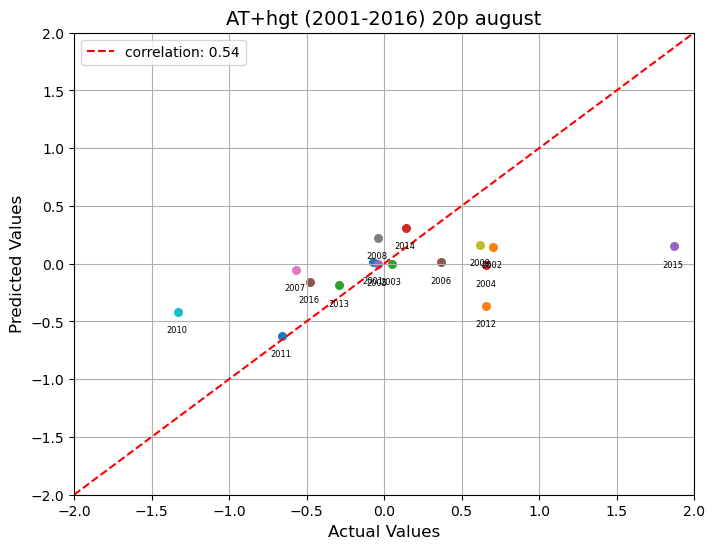

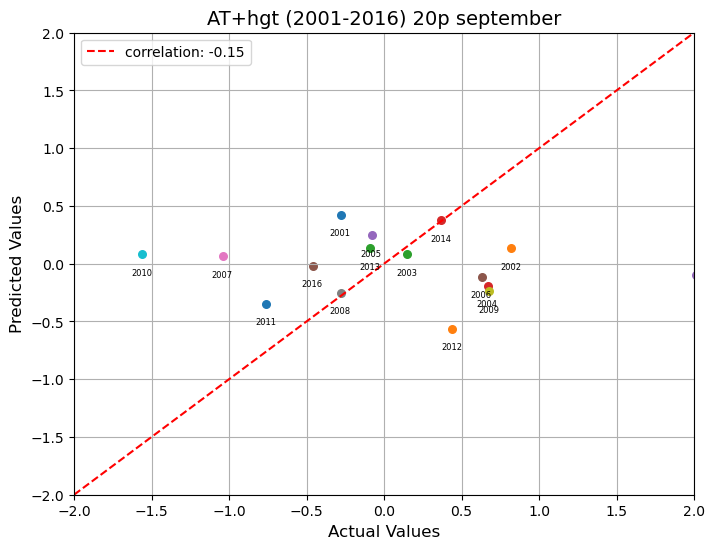

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'hgt+vwind (2001-2016) 20p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show